# Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


# Facial Image Inspection

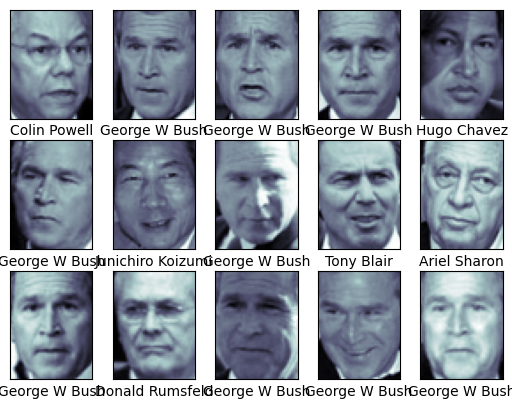

In [3]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# Data Preprocessing

In [4]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

# Data Splitting

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# Model Definition

In [6]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 2min 17s
Wall time: 36.6 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Use the best model

In [7]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

# Prediction Result

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

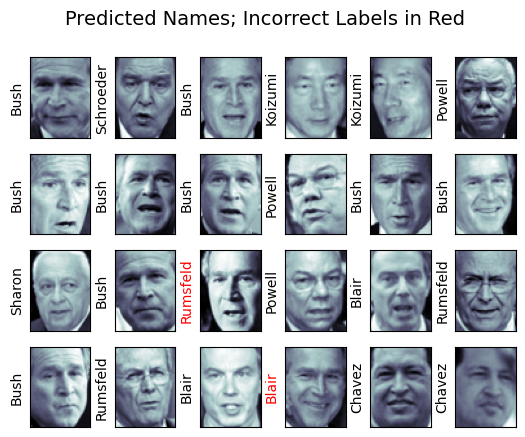

In [8]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

# Performance Check

In [9]:
classification_report(
    ytest, 
    yfit,
    target_names=faces.target_names
)

'                   precision    recall  f1-score   support\n\n     Ariel Sharon       0.65      0.87      0.74        15\n     Colin Powell       0.83      0.88      0.86        68\n  Donald Rumsfeld       0.70      0.84      0.76        31\n    George W Bush       0.97      0.80      0.88       126\nGerhard Schroeder       0.76      0.83      0.79        23\n      Hugo Chavez       0.93      0.70      0.80        20\nJunichiro Koizumi       0.86      1.00      0.92        12\n       Tony Blair       0.82      0.98      0.89        42\n\n         accuracy                           0.85       337\n        macro avg       0.82      0.86      0.83       337\n     weighted avg       0.86      0.85      0.85       337\n'

Text(113.92222222222219, 0.5, 'predicted label')

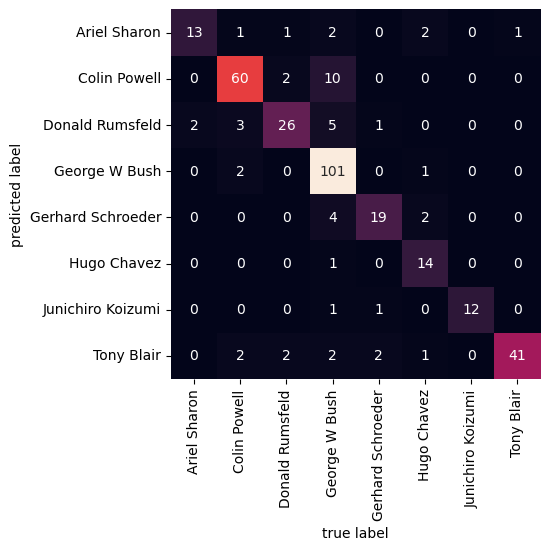

In [10]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')